In [1]:
import facet_ml
from facet_ml.classification.model_using import ModelApplication
from facet_ml.classification.model_training import load_feature_config
from facet_ml.static.path import STATIC_MODELS, STATIC_FOLDER
from sklearn import metrics
import glob
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

In [2]:
## 2023 Data ##
# Load Data from training
training_folder = os.path.join("..","..","ProcessedData","Training_Data_20231106")

csv_list = glob.glob(os.path.join(training_folder,"*"))
df_list = [pd.read_csv(csv,index_col=0) for csv in csv_list]

# Process data
df_total = pd.concat(df_list)
df_total.reset_index(drop=True)
df_total.replace([np.inf, -np.inf], np.nan, inplace=True)
df_total.dropna(axis=0,inplace=True)
df_total.drop(labels=["label","Filename","Region"],axis=1,inplace=True)

In [3]:
csv = os.path.join("..","..","ProcessedData","Training_Data_20240216","2024_02_27_Rachel-C_Processed.csv")
df_total = pd.read_csv(csv)
# Process data
df_total = pd.concat(df_list)
df_total.reset_index(drop=True)
df_total.replace([np.inf, -np.inf], np.nan, inplace=True)
df_total.dropna(axis=0,inplace=True)
df_total.drop(labels=["label","Filename","Region"],axis=1,inplace=True)

In [4]:
# Model_paths
model_folder = STATIC_FOLDER / "Models" / "2024_02__original_2024_features-agnostic"
crystal_multicrystal = model_folder / "RF_C_MC.sav"
crystalline_noncrystalline = model_folder / "RF_C-MC_I.sav"
crystal_multicrystal_incomplete = model_folder / "RF_C_MC_I.sav"
# Load models
def load_model(pickle_path:str):
    with open(pickle_path,"rb") as f:
        model = pickle.load(f)

    return model

#C_v_MC = load_model(STATIC_MODELS["crystal_multicrystal"])
#Crys_v_Nocrys = load_model(STATIC_MODELS["crystalline_noncrystalline"])
#total = load_model(STATIC_MODELS["crystal_multicrystal_incomplete"])
C_v_MC = load_model(crystal_multicrystal)
Crys_v_Nocrys = load_model(crystalline_noncrystalline)
total = load_model(crystal_multicrystal_incomplete)

In [5]:
def review_model_run(model_run):
    y_pred = model_run["model"].predict(model_run["X_test"])
    f1 = metrics.f1_score(y_pred,model_run["y_test"],average="macro")


    classes = model_run["model"].classes_
    confusion_matrix = metrics.confusion_matrix(model_run["y_test"],y_pred,labels=classes)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix,display_labels=classes)
    
    return f1,disp


0.7595337977608537


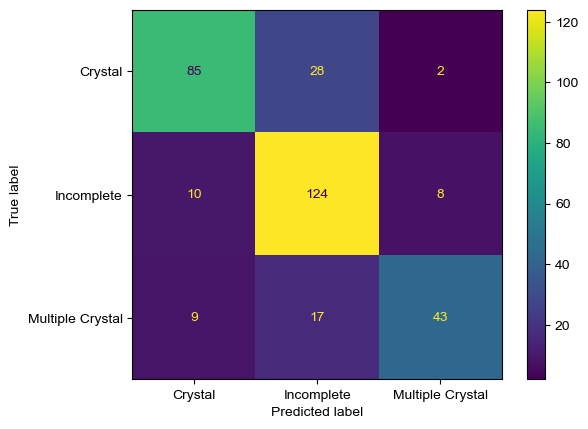

In [6]:
f1, disp = review_model_run(total)
print(f1)
disp.plot()

plt.savefig("S2_ConfusionMatrix_Total.png")

0.8283011098662223


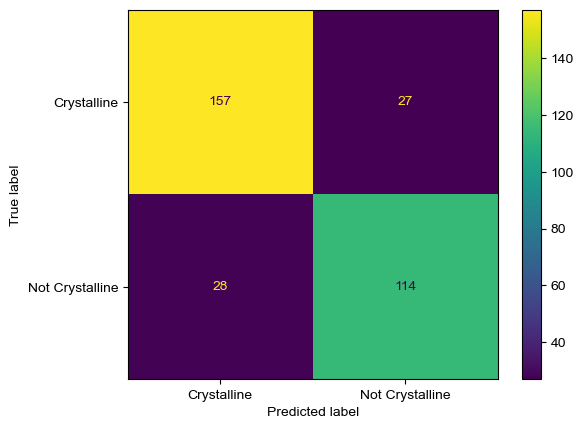

In [7]:
f1, disp = review_model_run(Crys_v_Nocrys)
print(f1)
disp.plot()

plt.savefig("S2_ConfusionMatrix_Crys-V-NonCrys.png")

0.925266347986378


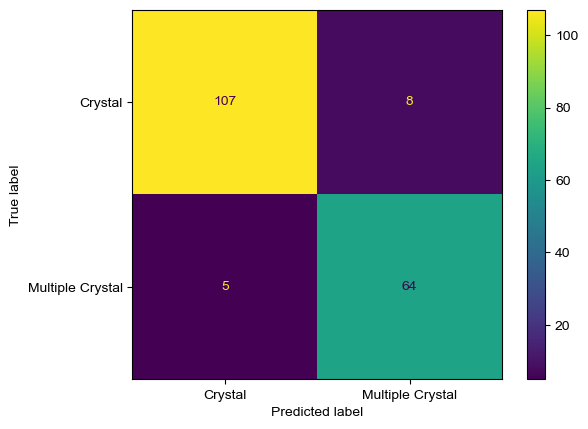

In [8]:
f1, disp = review_model_run(C_v_MC)
print(f1)
disp.plot()

plt.savefig("S2_ConfusionMatrix_Crys-V-MultiCrys.png")